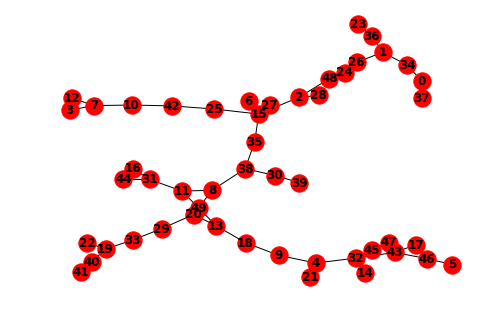

In [53]:
import networkx as nx
from utils import *
import matplotlib.pyplot as plt
import random



num_nodes = 50

# G = nx.Graph()
G = nx.connected_watts_strogatz_graph(num_nodes, 2, 1)


# nodes = [i for i in range(1, 8)]
# edges = [(1, 2), (1, 3),(2, 4), (3, 4), (4, 6), (5, 6), (5, 7), (6, 7)]

# G.add_nodes_from(nodes)
# G.add_edges_from(edges)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [48]:
valuations = {}
for i in range(len(G.nodes)):
    valuations[i] = {"valuation": random.randint(0, 100)}

valuations[0] = {"valuation": 0}
print(valuations)
nx.set_node_attributes(G, valuations)

{0: {'valuation': 0}, 1: {'valuation': 71}, 2: {'valuation': 52}, 3: {'valuation': 82}, 4: {'valuation': 26}, 5: {'valuation': 22}, 6: {'valuation': 76}, 7: {'valuation': 39}, 8: {'valuation': 65}, 9: {'valuation': 18}, 10: {'valuation': 78}, 11: {'valuation': 20}, 12: {'valuation': 84}, 13: {'valuation': 14}, 14: {'valuation': 34}, 15: {'valuation': 38}, 16: {'valuation': 86}, 17: {'valuation': 70}, 18: {'valuation': 30}, 19: {'valuation': 9}, 20: {'valuation': 40}, 21: {'valuation': 98}, 22: {'valuation': 49}, 23: {'valuation': 20}, 24: {'valuation': 31}, 25: {'valuation': 70}, 26: {'valuation': 21}, 27: {'valuation': 91}, 28: {'valuation': 33}, 29: {'valuation': 10}, 30: {'valuation': 80}, 31: {'valuation': 78}, 32: {'valuation': 3}, 33: {'valuation': 85}, 34: {'valuation': 64}, 35: {'valuation': 44}, 36: {'valuation': 64}, 37: {'valuation': 39}, 38: {'valuation': 30}, 39: {'valuation': 92}, 40: {'valuation': 7}, 41: {'valuation': 3}, 42: {'valuation': 23}, 43: {'valuation': 80}, 44

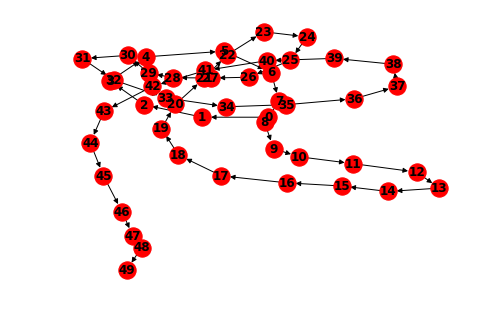

C:  [0, 21]
w:  21
analysis:  1


In [49]:
dfs_tree = nx.dfs_tree(G, source=0)
nx.draw(dfs_tree, with_labels=True, font_weight='bold')
plt.show()

w = get_w(valuations)
C = get_C(G, w)




print('C: ', C)
print('w: ', w)
print('analysis: ', analysis(G, C, w))
    



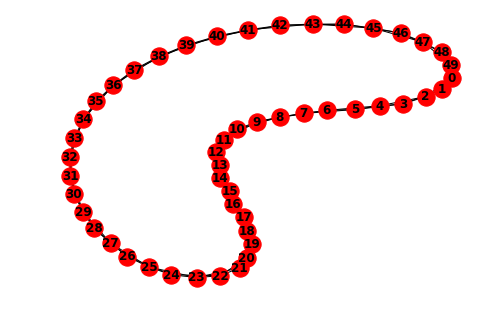

In [50]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

[0, 32]


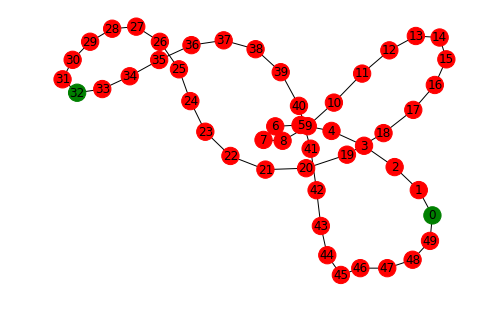

In [46]:
print(C)
color_map = []
for i in G.nodes:
    if i in C:
        color_map.append('green')
    else:
        color_map.append('red')

nx.draw(G, node_color=color_map, with_labels=True)

In [ ]:
def get_payments(G, C, w):
    p = {}
    dt = get_dt(G)
    order = sorted([i for i in dt if i in C], key=lambda x: dt[x])
    for i in range(len(order) - 1):
        if order[i] != 0:
            to = order[i]
            frm = order[i+1]
            tree_without_i = nx.dfs_tree(G, source=0)
            tree_without_i.remove_node(i)
            tree_without_i = nx.dfs_tree(tree_without_i, source=0)
            p[(frm, to)] = min()

    print(p)
    return p

get_payments(G, C, w)

def get_allocation(G, C, p):
    pass